# Изучение закономерностей, определяющих успешность игр

**Описание проекта** 

Выявлены параметры, определяющие успешность игры в разных регионах мира. На основании этого подготовлен отчет для магазина компьютерных игр для планирования рекламных кампаний. Проведена предобработка данных, анализ. Выбран актуальный
период для анализа. Составлены портреты пользователей каждого региона. Проверены гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые; средние пользовательские рейтинги жанров Action и Sports разные. При анализе использованы критерий Стьюдента для независимых выборок.

**Описание данных**

`Name` — название игры

`Platform` — платформа

`Year_of_Release` — год выпуска

`Genre — жанр` игры

`NA_sales` — продажи в Северной Америке (миллионы проданных копий)

`EU_sales` — продажи в Европе (миллионы проданных копий)

`JP_sales` — продажи в Японии (миллионы проданных копий)

`Other_sales` — продажи в других странах (миллионы проданных копий)

`Critic_Score` — оценка критиков (максимум 100)

`User_Score` — оценка пользователей (максимум 10)

`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Цель проекта**

Исследовать  и обработать полученные данные за прошлые годы и сделать прогноз о покупках на будущее. Выявить определяющие успешность игры закономерности.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from math import factorial
import seaborn as sns

# Шаг 1. Загрузка данных

In [2]:
try:
    data =  pd.read_csv('games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Итак, в таблице десять столбцов. Тип данных во всех столбцах — object и float64.

Согласно документации к данным:

* `Name` — название игры;
* `Platform` — платформа;
* `Year_of_Release` — год выпуска;
* `Genre` — жанр игры;
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий);
* `EU_sales` — продажи в Европе (миллионы проданных копий);
* `JP_sales` — продажи в Японии (миллионы проданных копий);
* `Other_sales` — продажи в других странах (миллионы проданных копий);
* `Critic_Score` — оценка критиков (максимум 100);
* `User_Score` — оценка пользователей (максимум 10);
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения. В названии столбцов строчные буквы сочетаются с прописными.

### Выводы

В каждой строке таблицы — данные о играх. Часть колонок описывает продажи в трех регионах (Северной Америки, Японии и Европе). Остальные колонки содержат оценочные данные о играх (оценки критиков, пользователей и рейтинг). 

Предварительно можно утверждать, что данных достаточно для проверки гипотез. Но встречаются пропуски в данных, а в названиях колонок — расхождения с хорошим стилем.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

# Шаг 2. Предобработка данных

In [5]:
data.columns # перечень названий столбцов таблицы df

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [6]:
#приведем названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()

In [7]:
data.columns # проверка результатов - перечень названий столбцов

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [8]:
data.isna().sum()# подсчёт пропусков

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

В имени игр и жанре нашлись два дубликата, эти строки можно удалить так как никакой информации они не дадут и это не повредит данным. Пропуски в годах не будем трогать, так как это не повлияет на наш анализ. В столбцах с оценочными данными достаточно много пропусков, лучше бы уточнить причину их отсутствия. Так как в нашем случае это невозможно, заменим отсутствующие данные на подходящие.

In [9]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

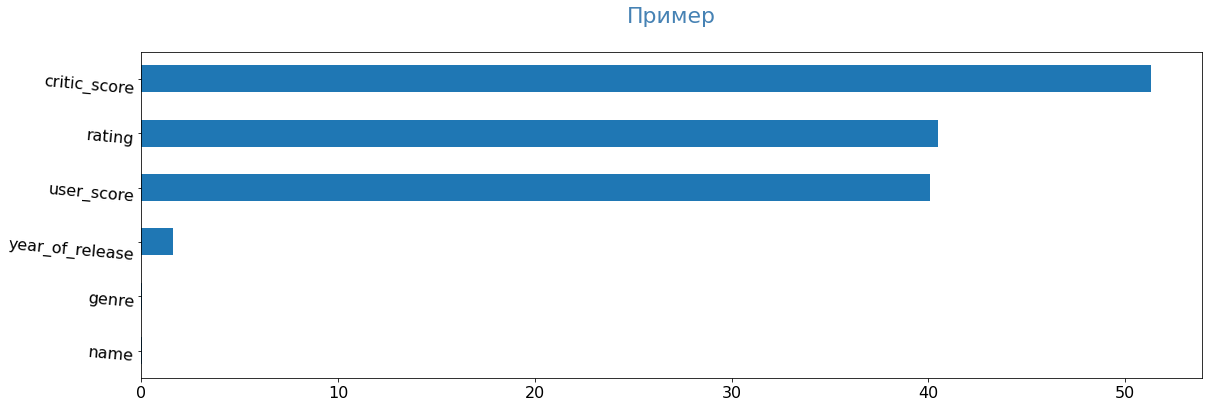

In [10]:
pass_value_barh(data)

In [11]:
data = data.drop(data[data['name'].isna()==True].index) #удалим строки с пропусками в названии и жанре.

In [12]:
#выведем уникальные значения столбца user_score
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [13]:
data[data['user_score']=='tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


В данных помимо NaN есть аббревиатура tbd. TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований. Таким образом игры в оценках пользователей которых стоит эта аббревиатура говорит о том, что оценки нет и можно воспринимать как отсутствие данных или NAN. Эта аббревиатура присутствует в 2424 строках и это достаточео много и удалить их нельзя не потеряв остальные данные. Заменим пропуски на 0.

In [14]:
#заменим tbd на пропуски
data['user_score'] = data['user_score'].replace('tbd', np.NaN)
#поменяем тип данных
data['user_score'] = data['user_score'].astype('float')

In [16]:
data['user_score'] = data['user_score'].fillna(-1)
data['critic_score'] = data['critic_score'].fillna(-1)

In [17]:
#выведем уникальные значения колонки rating
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Рейтинг игр состоит из буквенных символов, каждый из которых соответствует определённому возрасту для которых разрешены игры. Здесь пропуски заменим на "RP", что означает «Rating Pending» - «Рейтинг ожидается». Аналогично тому что данные пока отсутстыуют.

In [18]:
#заполним пропуски
data['rating'] = data['rating'].fillna('RP')

In [19]:
#проверим как мы справились
data.isna().sum()

name                 0
platform             0
year_of_release    269
genre                0
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score         0
user_score           0
rating               0
dtype: int64

In [20]:
#добавим столбец с суммой продаж во всех регионах
data['all_salts'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [21]:
#проверим данные на дубликаты
data.duplicated().sum()

0

In [22]:
data['name'] = data['name'].str.lower()
data['platform'].unique()
data['genre'] = data['genre'].str.lower()
data[['year_of_release', 'name', 'platform', 'genre']].duplicated().sum()

1

In [23]:
#data[['year_of_release', 'name', 'platform', 'genre']] = data[['year_of_release', 'name', 'platform', 'genre']].drop_duplicates()
#data[['year_of_release', 'name', 'platform', 'genre']].duplicated().sum()

In [24]:
data.drop_duplicates (subset=['year_of_release', 'name', 'platform', 'genre'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_salts
0,wii sports,Wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,NES,1985.0,platform,29.08,3.58,6.81,0.77,-1.0,-1.0,RP,40.24
2,mario kart wii,Wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,Wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,GB,1996.0,role-playing,11.27,8.89,10.22,1.00,-1.0,-1.0,RP,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,PS3,2016.0,action,0.00,0.00,0.01,0.00,-1.0,-1.0,RP,0.01
16711,lma manager 2007,X360,2006.0,sports,0.00,0.01,0.00,0.00,-1.0,-1.0,RP,0.01
16712,haitaka no psychedelica,PSV,2016.0,adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,RP,0.01
16713,spirits & spells,GBA,2003.0,platform,0.01,0.00,0.00,0.00,-1.0,-1.0,RP,0.01


In [25]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_salts


### Заключение

В таблице были заменены названия столбцов так как присутствовали буквы верхнего регистра. Обработаны данные на пропуски. Самое большое количество пропусков содержали столбцы с оценкой критиков, пользователей и рейтингом. Также обнаружена аббревиатура str, которая обозначала, что информации пока нет. Было решено заменить все str на NaN и пропуски в столбцах critic_score и user_score заполнили нулями. В столбце rating пропуски заполнили аббревиатцрой "RP", что означает "рейтинг ожидается" это вполне нам подходит так как данных действительно нет. Был изменен тип в столбце user_score из строкового на численный, так как в нем содержалась оценка пользователей в виде десятичной дроби. Пропуски в столбце year_of_release трогать не стали, так как они не повлияют на дальнейший анализ данных. Посчитали суммарнные продажи во всех регионах и записали в отдельный столбец. Дубликатов обнаружено небыло.

In [26]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
 11  all_salts        16713 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.7+ MB


# Шаг 3. Исследовательский анализ данных

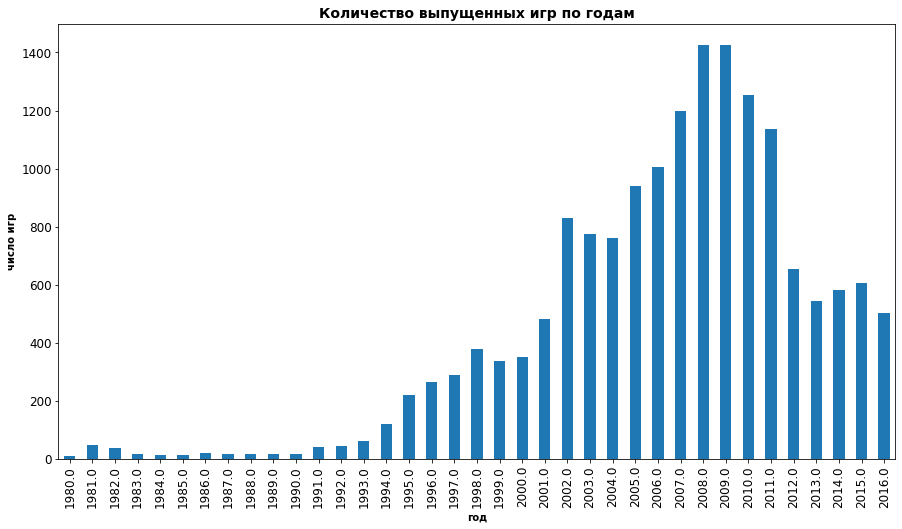

In [27]:
df_edition = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
df_edition.plot(kind = 'bar', figsize = (15,8), y='name', fontsize = 12, legend = False)
plt.title('Количество выпущенных игр по годам', fontsize=14, fontweight="bold")
plt.xlabel('год', fontsize=10, fontweight="bold")
plt.ylabel('число игр', fontsize=10, fontweight="bold")
plt.show()

Судя по графику можно заметить с 1991 года по 2001 постепенный рост. 1990-е годы были ознаменованы заметными инновациями в компьютерных играх. Основными достижениями называют переход от растровой графики к полностью полигональному 3D, снижение популярности аркадных игр и появление нескольких новых жанров - шутер от первого лица, стратегия в реальном времени и MMO. Затем с 2002 года произошел резкий подъем выпусков игр и дальнейшиее их увеличение. Это можно связать с усовершенствованием графики и выпуском новых консолей. Пик пришелся на 2008 и 2009 годы. После начинается спад, причем выпуск игр в 2012 году значительно упал и продолжал снижаться. Интерес к играм начинает падать, возможно это связано с тем, что нет принципиальных изменений и координально новых идей способных вернуть интерес пользователей. Количество выпущенных игр в 2016 году почти сравним с 2001. Так как революция компьютерных игр началась с 90-х годов, с этого момента и стоит анализировать данные. 

,all_salts
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


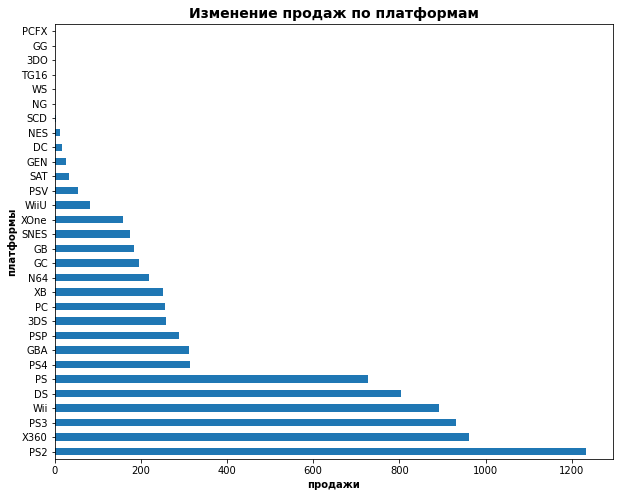

In [28]:
df_sales = data.query('year_of_release > 1990').pivot_table(index='platform', values='all_salts', aggfunc=sum)
display(df_sales.sort_values(by='all_salts', ascending=False).head(10))
df_sales.sort_values(by='all_salts', ascending=False).plot(kind = 'barh', figsize = (10,8), fontsize = 10, legend = False)
plt.title('Изменение продаж по платформам', fontsize=14, fontweight="bold")
plt.xlabel('продажи', fontsize=10, fontweight="bold")
plt.ylabel('платформы', fontsize=10, fontweight="bold")
plt.show()

Итак, самая популярная игра на платформе PS2 и далее по убыванию: X360, PS3, Wii, DS, Ps. Эти платформы выбиваются из общего списка по продажам. Поэтому будем продолжать работать с ними.

*Рассмотрим как ведут себя популярные платформы в продажах*

In [29]:
platform_6 = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
df_top = data.query('platform in @platform_6')

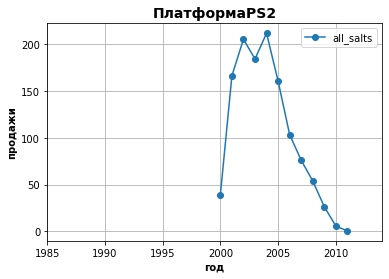

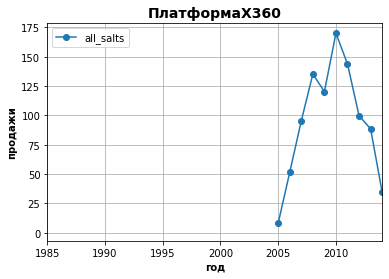

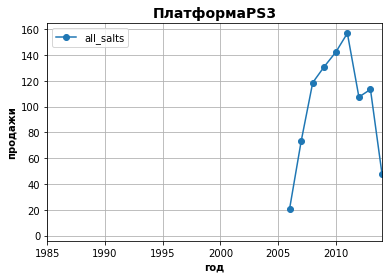

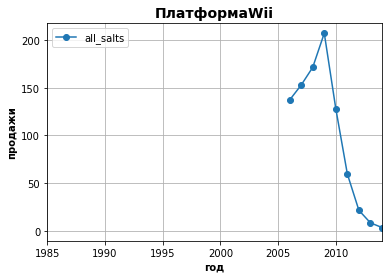

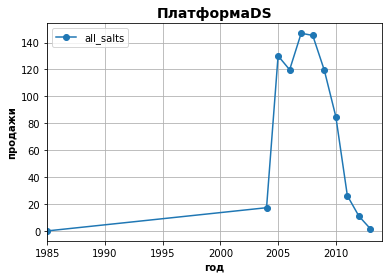

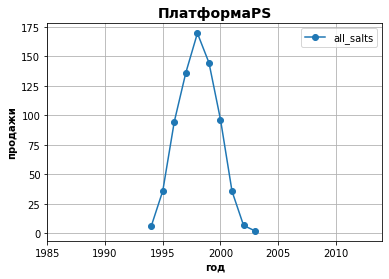

In [30]:
for i in platform_6:
    data[data['platform']==i].pivot_table(index='year_of_release', values='all_salts', aggfunc=sum).plot(
        grid=True, style='o-')
    plt.title('Платформа' + i, fontsize=14, fontweight="bold")
    plt.xlabel('год', fontsize=10, fontweight="bold")
    plt.ylabel('продажи', fontsize=10, fontweight="bold")
    plt.xlim(1985,2014)
    plt.show()

- PS2 просуществовала 11 лет, с 2000 по 2011 год. В 2001 году продажи резко подскочили и она имела успех до 2005 года, а затем стала сдавать позиции.

- PS3 запустили в 2006 году, график обрывается в 2016, значит она не закончила свое существование, просто дальнейших сведений у нас нет. Пик продаж приходится на 2011 год, затем резкий спад в 2012 и к 2013 году сумела немного подняться, но в дальнейшем неуклонное падение.

- Х360 начала продажи с 2005 года и аналогично PS3 вероятно еще в ходу. С 2005 по 2008 продажи соразмерно поднимались, пик пришелся на 2010 год. Но как и с PS3 начала сдавать позиции.

- Wii c 2006  продолжает существование. В течение первых 3-х лет наблюдался подъем, но с 2010 года начала падать в продажах.

- PS появилась в 1994 году и прожила до 2003 года. Всего она пробыла на рынке 9 лет. Постепенный рост, а затем такой-же постепенный спад. Пик продаж был в 1998 году.

In [31]:
data[data['platform']=='DS']['year_of_release'].min()

1985.0

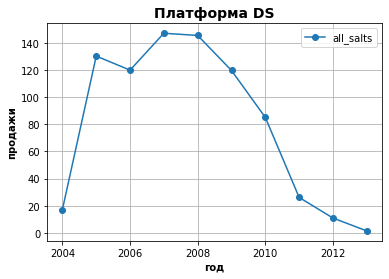

In [32]:
data[(data['platform']=='DS') & (data['year_of_release'] > 1985)].pivot_table(
    index='year_of_release',
    values='all_salts', aggfunc=sum).plot(grid=True, style='o-')
plt.title('Платформа DS', fontsize=14, fontweight="bold")
plt.xlabel('год', fontsize=10, fontweight="bold")
plt.ylabel('продажи', fontsize=10, fontweight="bold")
plt.show()

- DS Консоль была выпущена в 2004 году в Канаде, США и Японии. Настоящий прыжок эта платформа совержила в 2005 году, ее продажи резко выросли и держались на уровне до 2009, затем пошел спад и в 2013 году прекратила существование. 

### Заключение

Средняя продолжительнось существования платформы составляет 10 лет. В то время как одна платформа притерпевала спад другая поднималась. Это связаноо с тем, что интерес проявлялся к более новым и современным платформам, соответственно падал у устаревающих. Современные платформы являются более производительными, в связи с этим на них можно запускать игры с высокими ситстемниыми требованиями, соответственно с более качественной архитектурой. 

*Определим **актуальный период**: возмем те платформы которые не закончили свое существование и возмем период их больших пролдаж, то они придутся на 2008 - 2016 годы.*

In [33]:
#возьмем срез данных за 2008 - 2016 годы
df_actual = data.query('year_of_release > 2012').groupby(['platform']).agg({'all_salts': 'sum', 'year_of_release': 'first'})
df_actual = df_actual.sort_values(by='year_of_release', ascending=False)
df_actual

,all_salts,year_of_release
platform,,
PS4,314.14,2015.0
XOne,159.32,2015.0
PC,39.43,2014.0
PSV,32.99,2014.0
WiiU,64.63,2014.0
3DS,143.25,2013.0
DS,1.54,2013.0
PS3,181.43,2013.0
PSP,3.50,2013.0


Не учитывая в работе данные за предыдущие годы, можно выделить четыре наиболее перспективные платформы: PS4, XOne, 3DS, PS3. Исследуя ранее полученые графики, можно говорить о том, что продажи всех игр падают.

count    16713.000000
mean         0.533315
std          1.548282
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: all_salts, dtype: float64

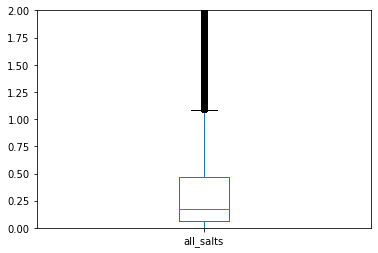

In [34]:
#построим диаграмму размаха по глобальным продажам игр
data['all_salts'].plot.box()
plt.ylim(0, 2)
data['all_salts'].describe()

В основном продажи составляют от 60 тыс. до 470 тыс. проданных копий. Медиана равна 170 тыс. Максимальное значение 82.54 млн. копий. Но есть игры которые не были востребованы, минимальное значение равно нулю.

In [35]:
df_box = pd.DataFrame({'PS4': data[data['platform']=='PS4']['all_salts'],
                      'PS3': data[data['platform']=='PS3']['all_salts'],
                      '3DS': data[data['platform']=='3DS']['all_salts'],
                      'XOne': data[data['platform']=='XOne']['all_salts'],
                      'X360': data[data['platform']=='X360']['all_salts'],
                      'PC': data[data['platform']=='PC']['all_salts'],
                      'PSV': data[data['platform']=='PSV']['all_salts'],
                      'WiiU': data[data['platform']=='WiiU']['all_salts'],
                      'DS': data[data['platform']=='DS']['all_salts'],
                      'PSP': data[data['platform']=='PSP']['all_salts'],
                      'Wii': data[data['platform']=='Wii']['all_salts']})
display(df_box.describe())

,PS4,PS3,3DS,XOne,X360,PC,PSV,WiiU,DS,PSP,Wii
count,392.000000,1331.000000,520.000000,247.000000,1262.000000,974.000000,430.000000,147.000000,2151.000000,1209.000000,1320.000000
mean,0.801378,0.705973,0.498077,0.645020,0.769746,0.266448,0.125744,0.559116,0.374765,0.243218,0.687508
std,1.609456,1.391749,1.430876,1.036139,1.615674,0.675577,0.212193,1.058836,1.426451,0.520210,3.126609
min,0.010000,0.000000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
25%,0.060000,0.110000,0.050000,0.060000,0.110000,0.020000,0.020000,0.080000,0.050000,0.030000,0.080000
50%,0.200000,0.270000,0.120000,0.220000,0.280000,0.050000,0.055000,0.220000,0.110000,0.090000,0.190000
75%,0.730000,0.750000,0.330000,0.685000,0.757500,0.170000,0.130000,0.525000,0.270000,0.230000,0.482500
max,14.630000,21.050000,14.600000,7.390000,21.820000,8.010000,1.960000,7.090000,29.800000,7.680000,82.540000


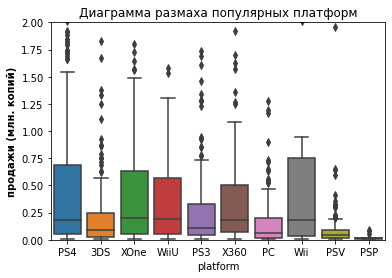

In [36]:
data_actual = data.query('year_of_release > 2013')

sns.boxplot(x='platform', y='all_salts', data=data_actual)\
.set (title='Диаграмма размаха популярных платформ')

plt.ylabel('продажи (млн. копий)', fontsize=10, fontweight="bold")
plt.ylim(0, 2);

In [37]:
data_actual = data.query('year_of_release > 2013')

### Заключение

Медиана в среднем от 50 тыс. до 220 тыс. Самые большие медианные значение у X360 и PS3 - 280 и 270 тыс. соответственно, наименьшее у PC и PSP - 50 и 90 тыс. Максимальные значения в пределах усов 1.75 млн.(PS4), минимальное значение почти у всех на уровне 10 тыс. PS и PSV имеют самый короткий ящик, что говорит о небольшом разнообразии в ценах и следовательно в играх. Четыре платформы имеют схожие и высокие значения q3, около 750 тыс. - это PS4, PS3, XOne и X360.

*Посмотрим как влияют на продажи отзывы пользователей и критиков на примере одной популярной платформы. В нашем случае это будет PS4.*

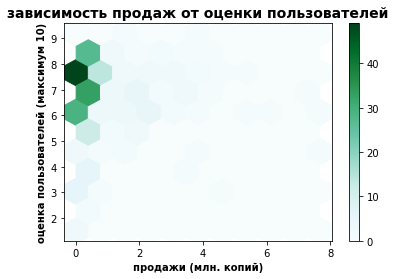

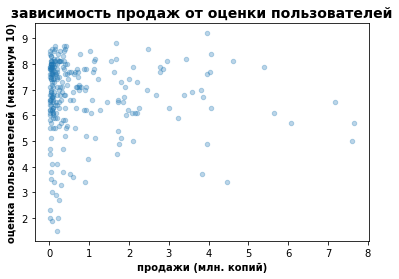

-0.0369325676249839

In [38]:
#узнаем зависимость количества продаж от оценки пользователей
#возьмем срез данных для PS4,отбросим нулевой рейтинг и продажи свыше 8 млн.
df_ps4 = data.query('platform == "PS4" and user_score != -1 and all_salts < 8')
df_ps4.plot(x='all_salts', y='user_score', kind='hexbin', gridsize=10, sharex=False)#построим ячеечную диаграмму
plt.title('зависимость продаж от оценки пользователей', fontsize=14, fontweight="bold")
plt.xlabel('продажи (млн. копий)', fontsize=10, fontweight="bold")
plt.ylabel('оценка пользователей (максимум 10)', fontsize=10, fontweight="bold")
plt.show()
df_ps4.plot(x='all_salts', y='user_score', kind='scatter', alpha=0.3)#построим точечную диаграмму
plt.title('зависимость продаж от оценки пользователей', fontsize=14, fontweight="bold")
plt.xlabel('продажи (млн. копий)', fontsize=10, fontweight="bold")
plt.ylabel('оценка пользователей (максимум 10)', fontsize=10, fontweight="bold")
plt.show()
df_ps4['all_salts'].corr(df_ps4['user_score'])#выведем значение корреляции

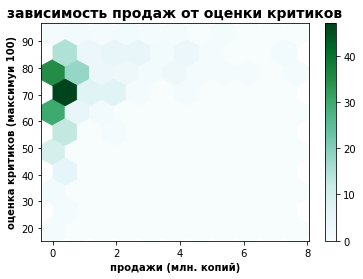

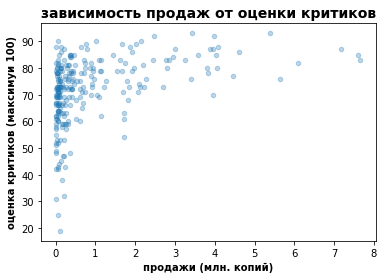

0.4009523709062502

In [39]:
#узнаем зависимость количества продаж от оценки пользователей
#возьмем срез данных для PS4, отбросим нулевой рейтинг и продажи свыше 8 млн.
df_ps4 = data.query('platform == "PS4" and critic_score != -1 and all_salts < 8')
df_ps4.plot(x='all_salts', y='critic_score', kind='hexbin', gridsize=10, sharex=False)#построим ячеечную диаграмму
plt.title('зависимость продаж от оценки критиков', fontsize=14, fontweight="bold")
plt.xlabel('продажи (млн. копий)', fontsize=10, fontweight="bold")
plt.ylabel('оценка критиков (максимуи 100)', fontsize=10, fontweight="bold")
plt.show()
df_ps4.plot(x='all_salts', y='critic_score', kind='scatter', alpha=0.3)#построим точечную диаграмму
plt.title('зависимость продаж от оценки критиков', fontsize=14, fontweight="bold")
plt.xlabel('продажи (млн. копий)', fontsize=10, fontweight="bold")
plt.ylabel('оценка критиков (максимуи 100)', fontsize=10, fontweight="bold")
plt.show()
df_ps4['all_salts'].corr(df_ps4['critic_score'])#выведем значение корреляции

### Вывод:

Коррелляция близка к нулю и равно -0.036. Как правило, коэффициент корреляции между 0,25 и 0,5 считается «слабой» корреляцией между двумя переменными. А вот с оценкой критиков все наоборот. Корреляция положительная и составляет 0.40 это неплохо и явно больше в сравнении с пользовательской. Если сравнивать зависимости продаж от оценок пользователей и критиков, то лучше больше внимания уделить именно критикам. Все же такая корреляция не достаточно велика, чтобы точно утверждать о сильной зависимости ведь она может быть не линейна. 

#### *Рассмотрим как зависят продажи от оценок других популярных платформ*

In [40]:
platform_11 = ['PS4', 'PS3', '3DS', 'XOne', 'X360', 'PC', 'PSV', 'WiiU', 'DS', 'PSP', 'Wii']
df_top11 = data[data['year_of_release'] > 2012].query('platform in @platform_11')
df_platform = df_top11[['platform', 'all_salts' ,'critic_score', 'user_score']].query('critic_score != -1 and user_score != -1')

/opt/conda/lib/python3.9/site-packages/seaborn/matrix.py:194: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/opt/conda/lib/python3.9/site-packages/seaborn/matrix.py:199: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


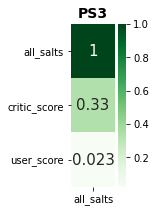

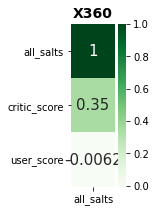

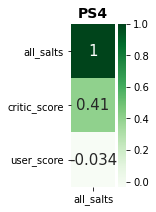

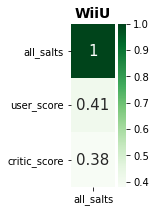

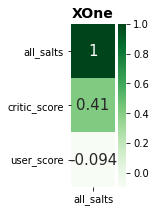

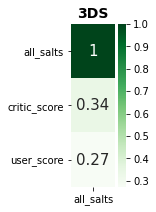

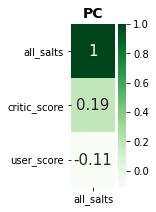

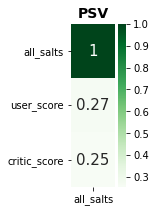

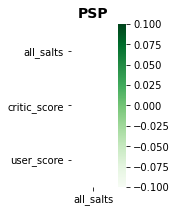

In [41]:
multy_map = []
for i in df_platform['platform'].unique():
    name_pl = df_platform[df_platform['platform']==i]    
    plt.figure(figsize = (1,3))
    multy_map.append(
        sns.heatmap(name_pl[['all_salts' ,'critic_score', 'user_score']].corr()[['all_salts']].sort_values(by='all_salts', ascending=False), cmap="Greens", 
            annot=True, annot_kws={'size':15}))
    plt.yticks(rotation=0)
    plt.title(i, fontsize=14, fontweight="bold") 

Для лучшего понимания зависимости построим для нескольких платформ матрицу рассеяния.

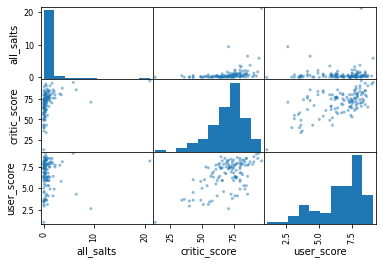

In [42]:
ps3 = df_platform[df_platform['platform']=='PS3']
ps4 = df_platform[df_platform['platform']=='PS4']
x_one = df_platform[df_platform['platform']=='XOne']
ds_3 = df_platform[df_platform['platform']=='3DS']
x_360 = df_platform[df_platform['platform']=='X360']
games_filtered_ps3 = ps3[['all_salts' ,'critic_score', 'user_score']]
games_filtered_x_one = x_one[['all_salts' ,'critic_score', 'user_score']]
games_filtered_ds_3 = ds_3[['all_salts' ,'critic_score', 'user_score']]
games_filtered_x_360 = x_360[['all_salts' ,'critic_score', 'user_score']]
pd.plotting.scatter_matrix(games_filtered_ps3); 

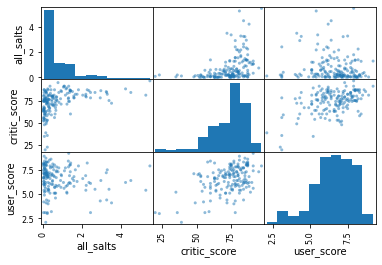

In [43]:
pd.plotting.scatter_matrix(games_filtered_x_one);

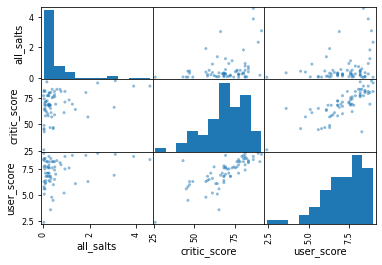

In [44]:
pd.plotting.scatter_matrix(games_filtered_ds_3);

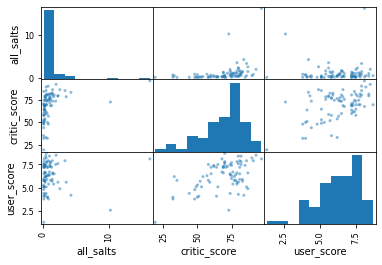

In [45]:
pd.plotting.scatter_matrix(games_filtered_x_360);

Оценка корреляции по платформам в целом похожа. Оценка критиков больше влияет на продажи, чем оценка пользователей. Корреляция оценки критиков в пределах от 0.19 до 0.41, а пользователей от 0.006 до 0.38. 

#### *Визуализируем суммарные продажи игр по жанрам и игровым платформам.*

<AxesSubplot:xlabel='genre', ylabel='platform'>

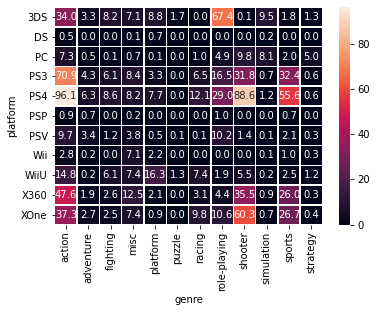

In [46]:
platform_genre_sales = df_top11.pivot_table(
                        index='platform', 
                        columns='genre', 
                        values='all_salts', 
                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.5)

Самыми прибыльными оказались игры жанров "Action", "Shooter" и "Sports" еще можно выделить жанр "role-playing" его покупали меньше, чем предыдущие два, но все же он выделяется из остальных жанров. Самыми низкими в продажах оказались игры жаров "Adventure", "Puzzle", "Strategy".

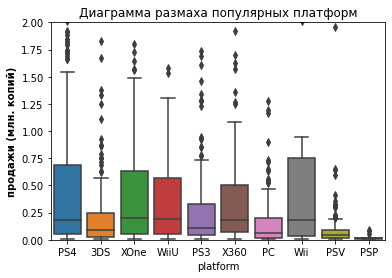

In [47]:
# check
sns.boxplot(x='platform', y='all_salts', data=data_actual)\
.set (title='Диаграмма размаха популярных платформ')

plt.ylabel('продажи (млн. копий)', fontsize=10, fontweight="bold")
plt.ylim(0, 2);

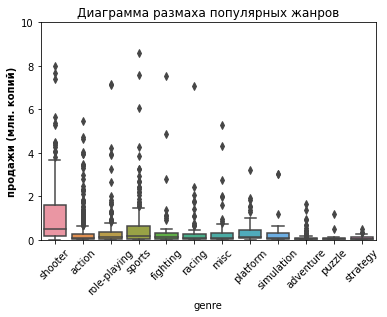

In [48]:
sns.boxplot(x='genre', y='all_salts', data=data_actual)\
.set (title='Диаграмма размаха популярных жанров')

plt.ylabel('продажи (млн. копий)', fontsize=10, fontweight="bold")
plt.xticks(rotation=45)
plt.ylim(0, 10);

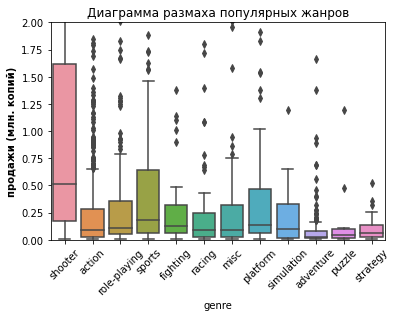

In [49]:
sns.boxplot(x='genre', y='all_salts', data=data_actual)\
.set (title='Диаграмма размаха популярных жанров')

plt.ylabel('продажи (млн. копий)', fontsize=10, fontweight="bold")
plt.xticks(rotation=45)
plt.ylim(0, 2);

### Вывод
- По выбросам можно отметить жанры shooter, sports, fighting, role-playing и racing там их больше, чем у остальных.
- Медиана варьируется от 0,1 до 0,52. Самое маленькое значение медианы у adventure, диапазон от q1 до q3 сравнительно малое, немного больше у платформ puzzle и strategy, но они всеже меньше чем у всех остальных жанров представленных на графике. Самые большие медианное значения у shooter - немного выше 0,50 и диапазон от q1 до q2 - примерно 1,45 млн. это самый длинный ящик из всех, что говорит о том, что значение продаж у этих игр различаются между собой сильнее, чем у остальных жанров.Это может говорить, что у жанра shooter достаточно большой ряд игр. Максимальные значения за которыми наблюдаются аномалии также у shooter около 3 млн. копий. Наименьшее максимальное значение до аномалий у adventure, pazzle и strategy. У остальных в диапазоне от 0,45 до 1,65 млн. копий. 

# Шаг 4. Портрет пользователя каждого региона

## Топ-5 популярные платформы

In [50]:
def regions_plot(groupby, sales, ax):
    df_regions = data[data['year_of_release']>2012].groupby(groupby).agg({sales: 'sum'}).sort_values(by=sales, ascending=False)[:5]
    title_dict = {'na_sales': 'Продажи в Северной Америке', 'eu_sales': 'Продажи в Европе', 'jp_sales': 'Продажи в Японии'}
    color_dict = {'na_sales': 'red', 'eu_sales': 'gray', 'jp_sales': 'forestgreen'}
    plot = df_regions.plot(kind='bar', ec='black', title=title_dict[sales], ax=axes[ax], 
                   fontsize=18, color=color_dict[sales], rot=20)
    plot.legend(prop={'size':17})
    plot.set_xlabel('')
    plot.title.set_size(20)

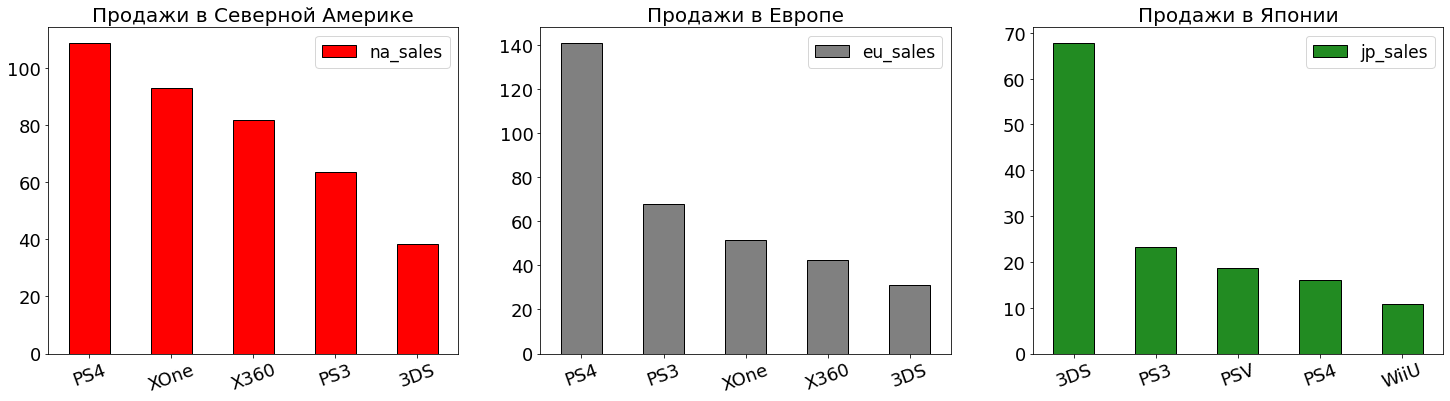

In [51]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

regions_plot('platform', 'na_sales', 0)
regions_plot('platform', 'eu_sales', 1)
regions_plot('platform', 'jp_sales', 2)

- В Европе самая популярная платформа c 2012 года PS4 - 140 млн. и силно недобирают до нее остальные, продажи которых составляют от 70 млн. до 45 млн. копий.

- В Северной Америке популярность имеют платформы PS4 - 120 млн., далее XOne - 90 млн. и далее с похожей разницей в 30 млн. копий убывают продажи остальных платформ.

- В Японии на первом месте стоит по продажам платформа 3DS продано 68 млн., остальные платформы имеют намного меньше продаж в среднем от 10 млн. до 25 млн. копий.

## Топ-5 популярные жанры

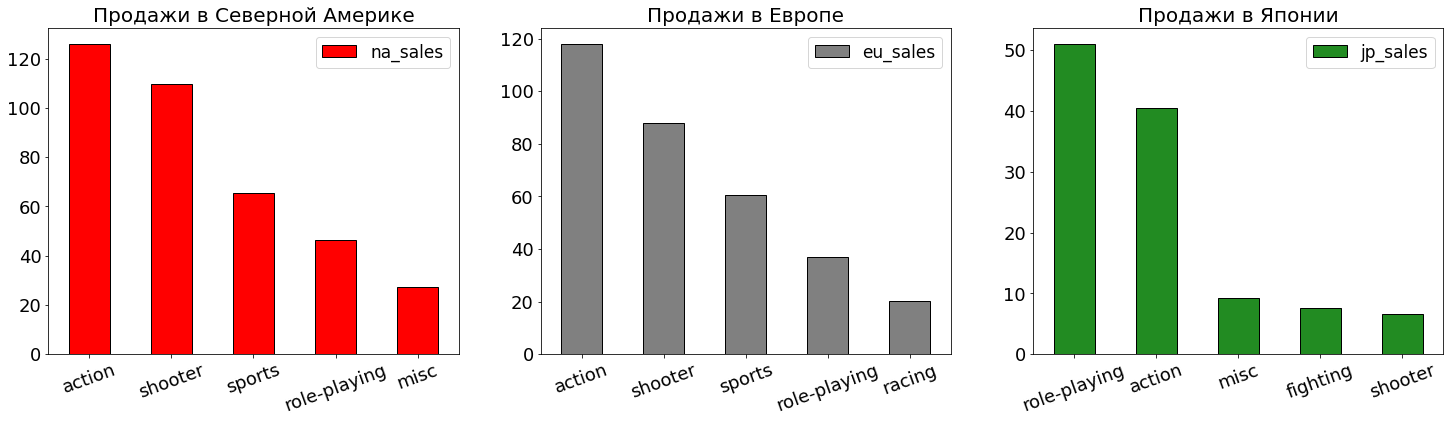

In [52]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

regions_plot('genre', 'na_sales', 0)
regions_plot('genre', 'eu_sales', 1)
regions_plot('genre', 'jp_sales', 2)

- В Eвропе на первом месте жанр action (чуть больше 120 млн.), далее по убыванию shooter (90 млн.)  и с  средней разницей в 25 млн. sports, role-playing и racing.

- В Северной Америке ситуаця очень напомиает ситуацию с жанрами в Европе. С первого по четвертое место занимают игры тех же жанров action, shooter, sports, role-playing а далее уже различаи. На последнем месте - misk. 

- В Японии лидирует жанр Role-Playinq (50 млн.), далее Action (40 млн.) сильно не дотягивают до них следующие четыре: misk, fighting и shooter продано приблизительно 10 млн. копий.

# Соотношение продаж платформ по регионам

In [53]:
America_Europe = ['PS4', 'XOne', 'PS3','X360', '3DS']
Japan = ['3DS', '3DS', 'PSV', 'PS4', 'PS3', 'WiiU']
df_1 = data[['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating', 'all_salts']]
df_2 = data[['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating', 'all_salts']]

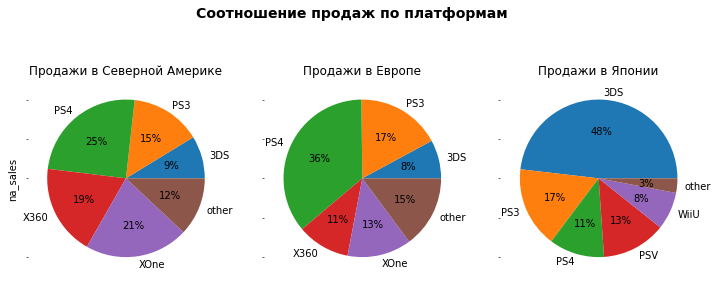

In [54]:
for i in df_1['platform']:
        if i not in America_Europe:
            df_1['platform'] = df_1[df_1['year_of_release']>2012]['platform'].replace(i, 'other')
for i in df_2['platform']:
        if i not in Japan:
            df_2['platform'] = df_2[df_2['year_of_release']>2012]['platform'].replace(i, 'other')            
df_regions1 = df_1.groupby('platform').agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'})[:6]
df_regions2 = df_2.groupby('platform').agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'})[:6]
title_dict = {'na_sales': 'Продажи в Северной Америке', 'eu_sales': 'Продажи в Европе', 'jp_sales': 'Продажи в Японии'}

fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 5))

df_regions1['na_sales'].plot(kind='pie', subplots=True, autopct='%.0f%%', ax=ax0)
ax0.set(title=title_dict['na_sales'])

df_regions1['eu_sales'].plot(kind='pie', subplots=True, autopct='%.0f%%', ax=ax1)
ax1.set(title=title_dict['eu_sales'])

df_regions2['jp_sales'].plot(kind='pie', subplots=True, autopct='%.0f%%', ax=ax2)
ax2.set(title=title_dict['jp_sales'])

# Заголовок фигуры
fig.suptitle('Cоотношение продаж по платформам', fontsize=14, fontweight='bold');
# Скрываем легенды
ax2.legend().set_visible(False)
ax1.legend().set_visible(False)
ax0.legend().set_visible(False)

### Вывод

По доли продаж игр в регионах можно заключить, что в Северной Америке и Европе лидирует платформа PS4, за ней по популярности, в Европе идет PS3, а в Америке XOne. В остальных платформах доли продаж не сильно различаются. По другому ведут себя продажи платформ в Японии. Там сильно преобладает платформа 3DS-48%, почти половина от общего числа. На втором месте PS3, а PS4 лишь на четвертом месте, а остральные платформы которые не вошли в топ-5 в Европе и Северной Амернике. В Японии всреднем продажи игр меньше, чем в Северной Америке и Европе и их интересы сильно отличаются. Думаю там выпускается достаточное количество других платформ и игр нацеленных на собственный рынок. А платформы X360 и XOne вообще не вошли в Топ-5 Японии. Можно сказать что там поддерживают отечественного производителя.

## Влияние рейтинга ESRB на продажи

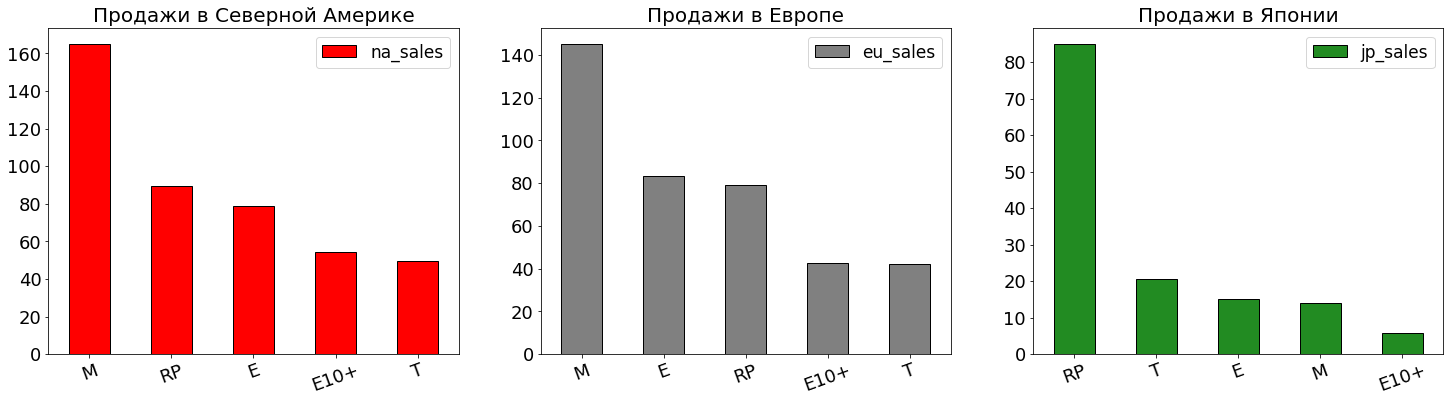

In [55]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

regions_plot('rating', 'na_sales', 0)
regions_plot('rating', 'eu_sales', 1)
regions_plot('rating', 'jp_sales', 2)

Во всех трех регионах наиболее часто встречающиеся рейтинги это M ("для взрослых", старше 17 лет), Е ("Для всех") и RP ("Рейтинг ожидается"). Не все игры получили рейтинг ESRB это может быть по нескольки причинам: игры которые вышли до того как начали присваивать етот рейтинг, а сейчас они устарели и в этом нет смысла, игры могут быть не так давно на рынке и рейтинг присвоят в скором будущем. Далее по убыванию рейтинги: T ("Подросткам"), E10+ ("Для всех от 10 лет и старше"). Нужно заметить, что во всех регионах картина почти одинакова. Сильно отличается в этом плане Япония, большинство игр не имеют рейтинга.

# Шаг 5. Проверка гипотез

**Гипотеза**

*Средние пользовательские рейтинги платформ Xbox One и PC одинаковые*

- Нулевая гипотеза: средние пользовательские рейтинги у плотформ Xbox One и PC равны

- Альтернативная гипотеза: средние пользовательские рейтинги у плотформ Xbox One и PC  не равны

In [56]:
data[data['platform']=="XOne"]['year_of_release'].min()

2013.0

In [57]:
#пользовательские оценки платформ
user_score_xbox = data[(data['platform']=="XOne") & (data['user_score'] != -1)]['user_score']
user_score_pc = data[(data['platform']=="PC") & (data['user_score'] != -1) & (data['year_of_release']>2012)]['user_score']

alpha = 0.05# уровень стат. значимости

# проведем стат. тест о равенстве рейтингов, которое которые имеют обе группы
results = st.ttest_ind(user_score_xbox, user_score_pc)

# выведем на экран получившееся p-значение
print('p-значение:', results.pvalue)

if results.pvalue < alpha: # сравниим p-значение с alpha
    print('Отвергаем нулевую гипотезу, рейтинги у платформ различны')
else:
    print('Не получилось отвергнуть нулевую гипотезу, платформы могут иметь одинаковый рейтинг')

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу, платформы могут иметь одинаковый рейтинг


In [58]:
user_score_xbox.head(2)

165    7.9
179    5.4
Name: user_score, dtype: float64

В данной случае мы проверили двустороннюю гипотезу. Она не была опровергнута. Значение p-value показывает: вероятность случайно получить такое или большее различие равна 14%, хотя средние рейтинги платформ и не одинаковы. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними рейтингами.

**Гипотеза**

Средние пользовательские рейтинги жанров Action и Sport разные.

- Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sport равны.

- Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sport различны.

In [59]:
user_score_action = data[(data['genre']=="action") & (data['user_score'] != -1)]['user_score']
user_score_sport = data[(data['genre']=="sports") & (data['user_score'] != -1)]['user_score']

In [60]:
#пользовательские оценки жанров
user_score_action = data[(data['genre']=="action") & (data['user_score'] != -1)]['user_score']
user_score_sport = data[(data['genre']=="sports") & (data['user_score'] != -1)]['user_score']

alpha = 0.05# уровень стат. значимости

results = st.ttest_ind(user_score_action, user_score_sport)# проведем стат. тест о равенстве рейтингов, которое имеют обе группы

# выведем на экран получившееся p-значение
print('p-значение:', results.pvalue)

if results.pvalue < alpha: # сравниим p-значение с alpha
    print('Отвергаем нулевую гипотезу, рейтинги жанров различаюися')
else:
    print('Не получилось отвергнуть нулевую гипотезу, жанры могут иметь одинаковый рейтинг')

p-значение: 0.10406951359049141
Не получилось отвергнуть нулевую гипотезу, жанры могут иметь одинаковый рейтинг


Значение p-value показывает: вероятность случайно получить такое или большее различие равна 10%, хотя средние пользовательские рейтинги жанров Action и Sport не одинаковы. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними рейтингами.

#### Шаг 6. Общий вывод

В данном проекте я исследовала данные интернет-магазина в котором была информация о жанре игр, их платформе, количестве проданных копий в Европе, Северной Америки, Японии и других странах. Также была информация об оценках критиков и пользователей, рейтинг по ESRB. В данных содержалось большое количество пропусков, которые необходимо было обработать. В ходе исследования удалось выяснить:

- 1990-е годы были ознаменованы заметными инновациями в компьютерных играх. Их продажи активно поднимались и пик настал в 2008, 2009 годах. Далее интерес к играм начал угасать. Популярность любой игры рано или поздно начнет падать так как прогрес не стоит на месте, появляются новые игры с лучшей графикой и архитектурой, которые задают больше требований к оснащению. В то время как одни игры уходят с рынка другие набирают обороты. Необходимо наблюдать за динамикой которая наблюдается в продажах, даже если сейчас игра пользуется малым спросом она может в ральнейшем сильно увеличить свои позиции.
- В результате анализа данных можно выделить несколько перспективных платформ: PS4, XOne, WiiU, 3DS. В Европе и Северной Америке уже популярны XOne и PS4, a в Японии и других регионах WiiU и 3DS. Для рекламных копаний стоит выбрать именно эти платформы. А вообще популярность всех платформ на данный момент падает. Те платформы которые были на пике популярности год назад уже не могут конкурировать с новыми. Большое влияние на покупательский спрос влияет хорошая картинка и простота понимания. В разных регионах предпочтение к платформам различаются, в каких-то лидирует одна, в каких-то другая. Явные различаи в продажах платформ имеет Япония, там предпочитают собственные марки.
- Наибольший интерес у пользователей к жанрам  action, shooter, role-playing менее популярны  racing, misc. Причем в разных регионах предпочтения к жанрм отличаются, сильнее выбивается Япония там лидирует жанр игр role-playing. У остальных жанров несомненно есть поклонники, но их сравнительно меньше.
- Оценка критиков имеет значение при продажи игр, хотя большое количество игр с высоким рейтингом продаются малым тиражем. А вот пользовательская мало влияет на спрос хотя их может быть больше. 
- Рейтинг по ESRB помогает в продажах. Очень удобно иметь понимание о содержании перед покупой. Этот рейтинг оценивает игры на предмет приемственности для той или иной возрастой группы.
- С большой долей вероятности можно сделать вывод, что средние пользовательские рейтинги могут оказаться разными, но этого недостачно чтобы делать вывод о значимом различии. Так для платформ с вероятностью 14%, а для жанров с вероятностью 10% рейтинги могут оказаться одинаковыми.